In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import random
from collections import Counter

In [0]:
iris = load_iris()
numbers = random.sample(range(100), 30) # generate 30 random values from [0, 100]
X = iris.data[:100, np.newaxis, 0] # get just the second feature
y = iris.target[:100]
print(X.shape)
print(y.shape)

# Extract test data
X_test = X[numbers] # select those 20 random examples for test
y_test = y[numbers]

# Extract training data: if they are not in test should be in training
c1 = Counter(X[:, 0].tolist()) # convert numpy array to list and hash it
c2 = Counter(X_test[:, 0].tolist())
diff = c1 - c2 # get differences between the two hashed lists
X_train = np.asarray(list(diff.elements())) # transfer result back to the numpy array
X_train = np.reshape(X_train, (X_train.shape[0], 1)) # add second dimension

c1 = Counter(y)
c2 = Counter(y_test)
diff = c1 - c2
y_train = np.asarray(list(diff.elements()))

print(X_train.shape)
print(y_train.shape)



(100, 1)
(100,)
(70, 1)
(70,)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficients: 
 [[5.33793321]]
Accuracy score: 0.87


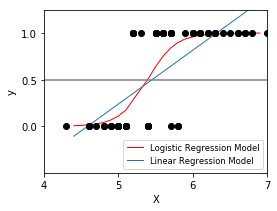

In [0]:
# create the classifier object
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X_train, y_train)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X_train.ravel(), y_train, color='black', zorder=20)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

# The coefficients
print('Coefficients: \n', clf.coef_)
# The accuracy percent
print("Accuracy score: %.2f"
      % accuracy_score(y_test, y_pred))

X_test = np.sort(X_test[:, 0]) # sorting the training data

# Plot logistic regression results
def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=1)

ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(4, 8))
plt.yticks([0, 0.5, 1])
plt.ylim(-.5, 1.25)
plt.xlim(4, 7)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
            loc="lower right", fontsize='small')
plt.show()